<a href="https://colab.research.google.com/github/LishaRudani/EDA-Laptop-Price-Prediction/blob/main/LaptopPricingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [4]:
df = pd.read_csv('/content/drive/MyDrive/laptop_dataset/changed.csv', encoding='latin-1')

In [5]:
df.shape

(168, 23)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(168, 22)

In [8]:
df.head()

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,RAM_GB,DDR_Version,...,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen,SSD,HDD
0,HP Spectre x360 Core i5 10th Gen - (8 GB/512 G...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,102990.0,8,4,...,10,Windows,512,SSD,13.3,HP,No,Yes,512,0
1,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,55990.0,8,4,...,8,Windows,512,SSD,14.0,Asus,Yes,No,512,0
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),56990.0,8,4,...,9,Windows,512,SSD,15.6,Acer,Yes,No,512,0
3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,42990.0,8,4,...,2,Windows,512,SSD,14.0,Asus,No,No,512,0
4,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52990.0,8,4,...,10,Windows,512,SSD,14.0,HP,No,No,512,0


In [9]:
df.isnull().sum()

Description              0
Processor                0
RAM                      0
Operating System         0
Storage                  0
Display                  0
Warranty                 0
Price                    0
RAM_GB                   0
DDR_Version              0
Processor Name           0
Processor Type           0
Generation               0
Operating System Type    0
Storage_GB               0
Disk Drive               0
Size(Inches)             0
Company                  0
Graphic Card             0
Touchscreen              0
SSD                      0
HDD                      0
dtype: int64

In [10]:
df.columns

Index(['Description', 'Processor', 'RAM', 'Operating System', 'Storage',
       'Display', 'Warranty', 'Price', 'RAM_GB', 'DDR_Version',
       'Processor Name', 'Processor Type', 'Generation',
       'Operating System Type', 'Storage_GB', 'Disk Drive', 'Size(Inches)',
       'Company', 'Graphic Card', 'Touchscreen', 'SSD', 'HDD'],
      dtype='object')

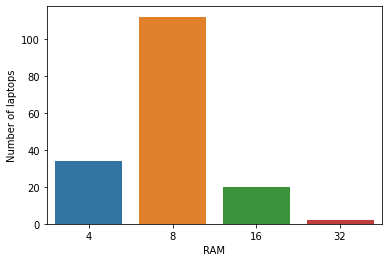

In [11]:
sns.countplot(x='RAM_GB',data=df)

plt.xlabel('RAM') 
plt.ylabel('Number of laptops') 

plt.show()

We can see that the maximum number of laptops have 8GB of RAM(above 100) and 4GB RAM will be fine for school purpose. 8GB RAM is optimal since its sufficient for college purpose and for normal games. Very few laptops have 32GB RAM. But if there are professional gamers then they prefer 16/32GB RAM laptops. Its obvious that as the size of the RAM increases, so does the price. Laptops with a higher RAM size are costly. But lets verify it now!

In [12]:
df.groupby('RAM_GB')['Price'].mean()

RAM_GB
4      39080.058824
8      68139.419643
16    164398.950000
32    271090.500000
Name: Price, dtype: float64

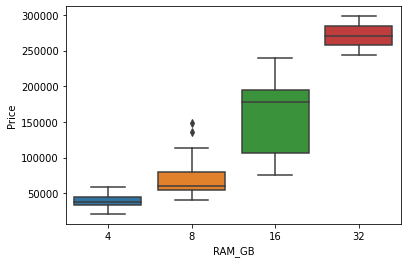

In [13]:
sns.boxplot(x='RAM_GB',y="Price",data=df)
plt.show()

So its evident that as the size of the RAM increases, the Price of the laptop also increases. There are even a few outliers for 8 GB RAM which indicates that even though RAM is 8GB the Price is very high.So the other features of the laptop might be excellent. But what can the other features be which makes it so expensive? Let's find out

In [14]:
df[df['RAM_GB']==8]['Price'].idxmax() # The index of the laptop with maximum price(8GB RAM)

145

In [15]:
df.iloc[145,7] # The maximum price for a 8GB laptop is 1,49,000

148999.0

In [16]:
df.iloc[145,:] # Checking all the features of that laptop

Description              Apple MacBook Pro Core i5 8th Gen - (8 GB/256 ...
Processor                                Intel Core i5 Processor (8th Gen)
RAM                                                          8 GB DDR3 RAM
Operating System                                   Mac OS Operating System
Storage                                                         256 GB SSD
Display                                       33.78 cm (13.3 inch) Display
Warranty                                            1 Year Onsite Warranty
Price                                                             148999.0
RAM_GB                                                                   8
DDR_Version                                                              3
Processor Name                                                       Intel
Processor Type                                                          i5
Generation                                                               8
Operating System Type    

So now we can understand the reason behind this Price. In general Apple Macbooks are very much expensive when compared to Windows/Linux laptops. Here the Macbook is of Intel i5 8th gen 256GB SSD which is pretty good for a Macbook! So that's the reason for a very high price of a 8GB RAM laptop.If it's a Windows one then the price won't be this high(given the same configurations of the processor,generation)

In [17]:
df.groupby('RAM_GB')['Price'].mean()

RAM_GB
4      39080.058824
8      68139.419643
16    164398.950000
32    271090.500000
Name: Price, dtype: float64

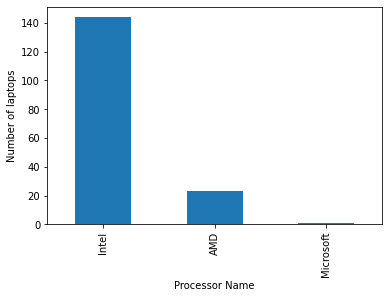

In [18]:
df['Processor Name'].value_counts().plot(kind='bar')

plt.xlabel('Processor Name')
plt.ylabel('Number of laptops')
plt.show()

In [19]:
a=df['Processor Name'].unique()
b=np.array(df['Processor Name'].value_counts())
b

array([144,  23,   1])

Nowadays Intel is the most preferred processor and most of the laptops have intel procesors only.They tend to offer better performance per core, but AMD compensates with more cores at a given price and better onboard graphics. In general Intel processors are expensive than AMD processors. Lets check if that is true!

In [20]:
pd.pivot_table(df,index='Processor Name',values='Price')

,Price
Processor Name,
AMD,53607.695652
Intel,79589.326389
Microsoft,96657.000000


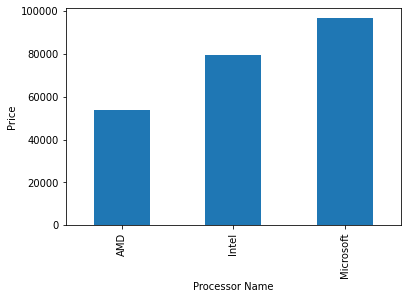

In [21]:
df.groupby('Processor Name')['Price'].mean().plot(kind='bar')
plt.xlabel('Processor Name')
plt.ylabel('Price')
plt.show()

There's only one laptop with Microsoft processor , but we're not going to take that into consideration. But the laptop's price is also high. Intel laptops are relatively costlier compared to AMD.

In [22]:
df.columns

Index(['Description', 'Processor', 'RAM', 'Operating System', 'Storage',
       'Display', 'Warranty', 'Price', 'RAM_GB', 'DDR_Version',
       'Processor Name', 'Processor Type', 'Generation',
       'Operating System Type', 'Storage_GB', 'Disk Drive', 'Size(Inches)',
       'Company', 'Graphic Card', 'Touchscreen', 'SSD', 'HDD'],
      dtype='object')

In [23]:
grouped = df.groupby(['Processor Name','Processor Type'])
grouped.size()

Processor Name  Processor Type
AMD             APU                4
                Athlon             1
                Ryzen 3            2
                Ryzen 5           13
                Ryzen 7            3
Intel           Pentium            4
                i3                24
                i5                79
                i7                32
                i9                 4
                m3                 1
Microsoft       SQ1                1
dtype: int64

Intel and AMD processors also have different type of CPUs and these inturn have different gens. Intel has i3,i5,i7,i9,Pentium CPUs and AMD has Ryzen3,Ryzen5,Ryzen7 CPUs. Core i7 CPUs are better than most Core i5 CPUs, which are in turn better than most Core i3 CPUs which are in turn better than Pentium CPU. They are just names to indicate the relative performance. Core i3 series has only dual-core processors, while the Core i5 and Core i7 series have both dual-core and quad-core processors. Quad-cores are usually better than dual-cores. In general i7 CPUs are expensive than i5 CPUs which are in turn expensive than i3 CPUs. As we go from i3 to i5 to i7 to i9 the performance,speed,price keeps increasing. Similar is the case with AMD Ryzen versions(Ryzen 7 > Ryzen 5 > Ryzen3)
So here most of the laptops have Intel processors and most of these Intel processors have i5 CPUs.

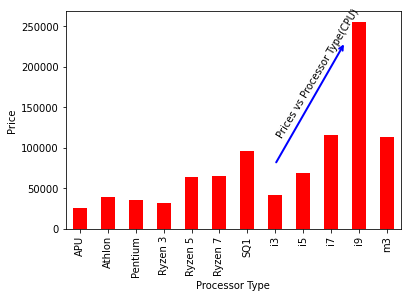

In [24]:
df.groupby('Processor Type')['Price'].mean().plot(kind='bar',color='red')
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(9.5, 230000),        # place head of the arrow at point (between i7 and i9 , Price 230000)
             xytext=(7,80000),        # place base of the arrow at point (top of i3 , Price 80000)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Prices vs Processor Type(CPU)',   # text to display
             xy=(7,110000),                     # start the text at at point (on top of i3 , Price 110000)
             rotation=59,                       # based on trial and error to match the arrow
             va='bottom',                       # want the text to be vertically 'bottom' aligned
             ha='left',                         # want the text to be horizontally 'left' algned.
            )
plt.ylabel('Price')
plt.show()

So on an average Intel processors are expensive than AMD and in Intel, i9 > i7 > i5 > i3. Similarly in AMD, Ryzen 7 > Ryzen 5 > Ryzen 3

Find out about m3 processors

In [25]:
df['Generation'].unique() # Here 0 represents Not Mentioned(The CPU's generation is not mentioned)
# For example in the Processor column,its mentioned AMD Ryzen 5 Quad Core Processor-so here the company and CPU is mentioned but the generation is not

array([10,  8,  9,  2,  0,  3,  5,  7])

We have seen that i7 > i5 > i3 but here even there is one more distinguishing factor which is the generation of the CPU. In general, in terms of speed and performance 10th gen > 9th gen > 8th gen laptops(given the same CPU configuration). For example, if we wish to compare 2 laptops in terms of speed and perforamnce then we need to look at the type of processors. If both of them are Intel then we need to look at the CPU(if its i7/i5/i3).If both the CPUs are same then we need to go for the generation.If both the generations are same(Intel Core i5 9th gen,Intel Core i5 9th gen) then we need to look at the other specifications of the laptop.
So here most of the laptops have CPUs which are of 10th generation. Price of a laptop is determined by all the features/specifications.

We have seen that most of the laptops have i5 CPUs. But among i5 let's check the generations!

In [26]:
pro_with_gen = pd.crosstab(index=df["Generation"],columns=df["Processor Type"])
pro_with_gen

Processor Type,APU,Athlon,Pentium,Ryzen 3,Ryzen 5,Ryzen 7,SQ1,i3,i5,i7,i9,m3
Generation,,,,,,,,,,,,
0,4,1,4,2,11,2,1,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,3,2,2,0,1
8,0,0,0,0,0,0,0,6,35,11,1,0
9,0,0,0,0,0,0,0,0,7,9,3,0
10,0,0,0,0,0,0,0,15,33,10,0,0


In [27]:
df['Operating System Type'].value_counts()

Windows    154
Mac         10
DOS          3
Linux        1
Name: Operating System Type, dtype: int64

Almost 90% of the laptops use Windows as the main Operating System.Very few laptops use DOS and Linux. Even Mac is very famous but majority of them use Windows. Laptops can also be dual booted(can have more than 2 OS). For example, one laptop can have Windows as well as Linux(this is not supported by Mac) but here we deal with only one OS.

In [28]:
pd.pivot_table(df,index='Operating System Type',values='Price')

,Price
Operating System Type,
DOS,46412.333333
Linux,43990.000000
Mac,181077.600000
Windows,70107.103896


We can clearly see that the price of Macbook is very high. We have already seen this before(even though many other laptops had 8GB RAM, but particularly the price of Mac with 8GB was very high)

In [29]:
pd.pivot_table(df, index = ['RAM_GB','Operating System Type'], values = 'Price').sort_values('RAM_GB', ascending = False)

Price
RAM_GB Operating System Type               
32     Windows                271090.500000
16     Mac                    210627.142857
       Windows                139506.846154
8      DOS                     79257.000000
       Linux                   43990.000000
       Mac                    112128.666667
       Windows                 67027.869159
4      DOS                     29990.000000
       Windows                 39648.187500

We have already seen that even though its 8GB RAM, the price for Mac was very high.From this table its evident that Mac is very expensive compared to Windows(the price of the laptop depends on many other features as well).The Price column shows us the average price for all the categories.

In [30]:
df['Disk Drive'].value_counts()

SSD     88
Both    46
HDD     34
Name: Disk Drive, dtype: int64

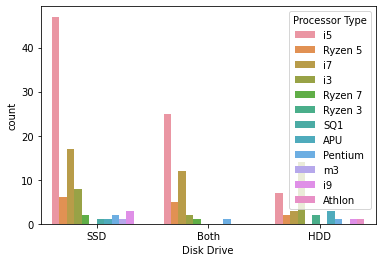

In [31]:
sns.countplot(x="Disk Drive", hue="Processor Type", data=df)

Both in the sense laptop contains both HDD and SSD.

In [32]:
df['Size(Inches)'].value_counts()

14.0    65
15.6    65
13.3    18
13.0     6
17.3     4
16.0     3
10.0     3
15.0     2
12.3     1
15.4     1
Name: Size(Inches), dtype: int64

As we can see most of the laptops nowadays are of 15.6 inches

In [33]:
df[df['Size(Inches)']==14.0]['Operating System Type']

1      Windows
3      Windows
4      Windows
5      Windows
9      Windows
        ...   
144    Windows
152    Windows
155    Windows
161    Windows
163    Windows
Name: Operating System Type, Length: 65, dtype: object

In [34]:
df['Company'].value_counts()

Asus         45
HP           37
Lenovo       26
Acer         22
Apple         9
Dell          8
Microsoft     8
MSI           6
Alienware     4
MarQ          1
Avita         1
Nexstgo       1
Name: Company, dtype: int64

So the maximum number of laptops are of Asus. We have already seen that the price of Apple Macbook is very high but let's see if there is any other company which beats Apple in terms of price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


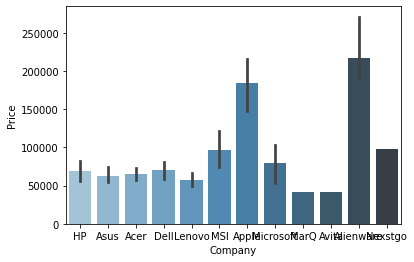

In [35]:
sns.barplot("Company", y="Price", data=df,
                 palette="Blues_d")

There are only 4 Alienware laptops but the price is very costly and this beats Apple mac as well. They are the most expensive among all the companies. After Alienware it's again Apple.

Previously I just stated that i9 processors are expensive than i7 which in turn as expensive than i5 and i3. But is that true?

In [36]:
pd.pivot_table(df, index = ['Company','Processor Type'], values = 'Price').sort_values('Company', ascending = False)

Price
Company   Processor Type               
Nexstgo   i5               97990.000000
Microsoft i7              135990.000000
          i5               96657.000000
          SQ1              96657.000000
          Ryzen 5          93999.000000
          Pentium          38599.000000
MarQ      i5               41990.000000
MSI       i7              103743.400000
          i5               60990.000000
Lenovo    i3               37490.000000
          APU              20990.000000
          i7               82931.000000
          i5               67756.600000
HP        i7              148294.750000
          i5               74169.214286
          i3               42320.000000
          Ryzen 7          57990.000000
          Ryzen 5          59990.000000
          Ryzen 3          31620.000000
          APU              25990.000000
Dell      i7               89240.000000
          i5               61669.000000
          Ryzen 5          74990.000000
          i3               59437.000000
Avita     i5               41990.000000
Asus      Ryzen 5          45490.000000
          i9              244191.000000
          i7               85062.200000
          i5               59149.000000
          i3               43990.000000
          Ryzen 7          74910.000000
          APU              26990.000000
Apple     i7              214945.000000
          i5              159774.250000
          m3              112990.000000
          i9              239900.000000
Alienware i9              297990.000000
          i7              189990.000000
Acer      i3               43410.500000
          Ryzen 7          61990.000000
          Pentium          27420.000000
          i5               62698.333333
          i7               90990.000000
          Athlon           39999.000000

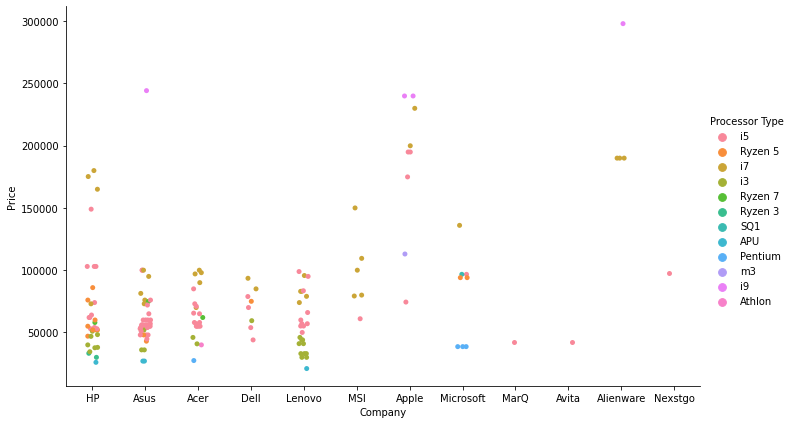

In [37]:

sns.catplot(x="Company", y="Price", hue="Processor Type", data=df,height=6, aspect=10/6)


So from the table and the plot it is noticeable that the i9 processors are the most expensive, and then comes i7. For every company i9 laptops are costlier than i7 and i7 costlier than i5. There might be a few cases where i5 price > i7 price(this totally depends on the generation and other specifications such as RAM,SSD/HDD etc)


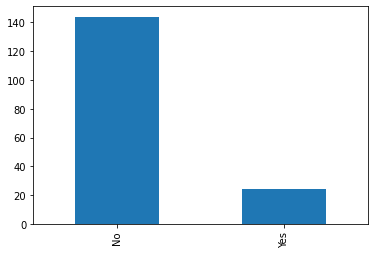

In [38]:
df['Touchscreen'].value_counts().plot(kind='bar')

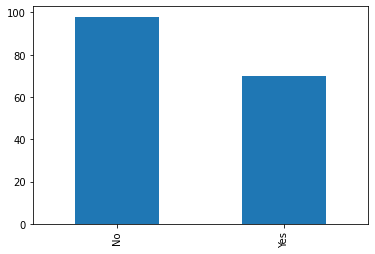

In [39]:
df['Graphic Card'].value_counts().plot(kind='bar')

Most of the laptops do not have the touchscreen facility. Most of the laptops do not have graphic card which is actually bad because 2GB Graphic card is a must these days even for basic purposes.

In [40]:
df.columns

Index(['Description', 'Processor', 'RAM', 'Operating System', 'Storage',
       'Display', 'Warranty', 'Price', 'RAM_GB', 'DDR_Version',
       'Processor Name', 'Processor Type', 'Generation',
       'Operating System Type', 'Storage_GB', 'Disk Drive', 'Size(Inches)',
       'Company', 'Graphic Card', 'Touchscreen', 'SSD', 'HDD'],
      dtype='object')

In [41]:
a=np.array(df['Company'].value_counts())
a

array([45, 37, 26, 22,  9,  8,  8,  6,  4,  1,  1,  1])

In [42]:
df['Company'].value_counts()

Asus         45
HP           37
Lenovo       26
Acer         22
Apple         9
Dell          8
Microsoft     8
MSI           6
Alienware     4
MarQ          1
Avita         1
Nexstgo       1
Name: Company, dtype: int64

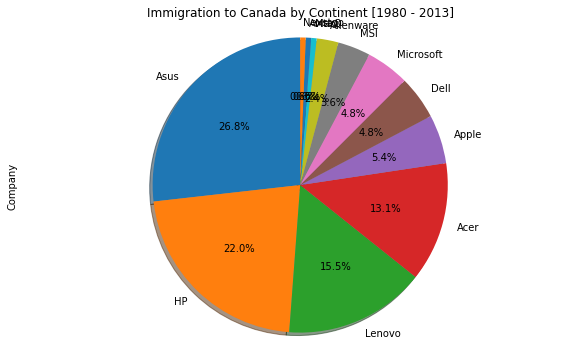

In [43]:
# autopct create %, start angle represent starting point
df['Company'].value_counts().plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


In [44]:
df

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,RAM_GB,DDR_Version,...,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen,SSD,HDD
0,HP Spectre x360 Core i5 10th Gen - (8 GB/512 G...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,102990.0,8,4,...,10,Windows,512,SSD,13.3,HP,No,Yes,512,0
1,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,55990.0,8,4,...,8,Windows,512,SSD,14.0,Asus,Yes,No,512,0
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),56990.0,8,4,...,9,Windows,512,SSD,15.6,Acer,Yes,No,512,0
3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,42990.0,8,4,...,2,Windows,512,SSD,14.0,Asus,No,No,512,0
4,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52990.0,8,4,...,10,Windows,512,SSD,14.0,HP,No,No,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Lenovo Ideapad Slim APU Dual Core A4 - (4 GB/6...,AMD APU Dual Core A4 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,128 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,20990.0,4,4,...,0,Windows,128,SSD,14.0,Lenovo,No,No,128,0
164,Acer Predator Triton 300 Core i7 9th Gen - (8 ...,Intel Core i7 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,2 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),97990.0,8,4,...,9,Windows,2000+256,Both,15.6,Acer,Yes,No,256,2000
165,Lenovo Yoga 730 Core i5 8th Gen - (8 GB/512 GB...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,94990.0,8,4,...,8,Windows,512,SSD,13.3,Lenovo,No,Yes,512,0
166,Asus ZenBook Core i7 10th Gen - (16 GB/1 TB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,99990.0,16,4,...,10,Windows,1000,SSD,13.3,Asus,No,No,1,0
